#### Columns Description

- auction_id: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.

- experiment: which group the user belongs to - control or exposed.

- control: users who have been shown a dummy ad
exposed: users who have been shown a creative, an online interactive ad, with the SmartAd brand.
date: the date in YYYY-MM-DD format

- hour: the hour of the day in HH format.

- device_make: the name of the type of device the user has e.g. Samsung

- platform_os: the id of the OS the user has.

- browser: the name of the browser the user uses to see the BIO questionnaire.

- yes: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.

- no: 1 if the user chooses the “No” radio button for the BIO questionnaire.

In [95]:
import pandas as pd

In [96]:
ads=pd.read_csv("AdSmartABdata - AdSmartABdata.csv",parse_dates=True)
ads.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


###### Basic data exploration

In [97]:
#show the first 5 rows of the data
ads.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [98]:
#show the last 5 rows of the data
ads.tail()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0


In [99]:
#show the number of rows and columns
ads.shape

(8077, 9)

There are 8077 rows and 9 columns.

In [100]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


5 of the variables are categorical (labelled as 'object') while the remaining 4 are numerical (labelled as 'int').

In [101]:
#convert date object to date datatype
ads['date_of_experiment']=pd.to_datetime(ads['date'])
ads.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,date_of_experiment
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-10
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-07
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,2020-07-05
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,2020-07-03
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-03


In [102]:
ads.drop('date',axis=1,inplace=True)
ads.head()

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no,date_of_experiment
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-10
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-07
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2,E5823,6,Chrome Mobile WebView,0,1,2020-07-05
3,00187412-2932-4542-a8ef-3633901c98d9,control,15,Samsung SM-A705FN,6,Facebook,0,0,2020-07-03
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,15,Generic Smartphone,6,Chrome Mobile,0,0,2020-07-03


In [103]:
ads.set_index('date_of_experiment',inplace=True)
ads.head()

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
date_of_experiment,,,,,,,,
2020-07-10,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-07,000eabc5-17ce-4137-8efe-44734d914446,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2,E5823,6,Chrome Mobile WebView,0,1
2020-07-03,00187412-2932-4542-a8ef-3633901c98d9,control,15,Samsung SM-A705FN,6,Facebook,0,0
2020-07-03,001a7785-d3fe-4e11-a344-c8735acacc2c,control,15,Generic Smartphone,6,Chrome Mobile,0,0


In [104]:
#returns the number of unique values for each variable
ads.nunique(axis=0)

auction_id     8077
experiment        2
hour             24
device_make     269
platform_os       3
browser          15
yes               2
no                2
dtype: int64

In [105]:
#prints the summary statistic of the numerical variables.
ads.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


The following summary statistics can be obtained:-

Mean - arithmetic average of the data

Median - median represents the 50th percentile, or the middle value of the data, that separates the distribution into two halves.

Mode - most frequent value of a variable

Standard Deviation - quantify the amount of variation of a set of data values from its mean.A low standard deviation for a variable indicates that the data points tend to be close to its mean, and vice versa.

Variance - square of the standard deviation and the covariance of the random variable with itself.

Interquartile Range - calculated as the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile). The IQR is also a very important measure for identifying outliers and could be visualized using a boxplot.

Skewness
- the measure of the symmetry, or lack of it, for a real-valued random variable about its mean. The skewness value can be positive, negative, or undefined. 
- In a perfectly symmetrical distribution, the mean, the median, and the mode will all have the same value.
- The skewness values can be interpreted in the following manner:
    - Highly skewed distribution: If the skewness value is less than −1 or greater than +1.
    - Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.
    - Approximately symmetric distribution: If the skewness value is between −½ and +½.


In [106]:
#prints statistics of all the variables
ads.describe(include='all')

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
count,8077,8077,8077.000000,8077,8077.000000,8077,8077.000000,8077.000000
unique,8077,2,NaN,269,NaN,15,NaN,NaN
top,0008ef63-77a7-448b-bd1e-075f42c55e39,control,NaN,Generic Smartphone,NaN,Chrome Mobile,NaN,NaN
freq,1,4071,NaN,4743,NaN,4554,NaN,NaN
mean,NaN,NaN,11.615080,NaN,5.947134,NaN,0.070818,0.083075
std,NaN,NaN,5.734879,NaN,0.224333,NaN,0.256537,0.276013
min,NaN,NaN,0.000000,NaN,5.000000,NaN,0.000000,0.000000
25%,NaN,NaN,7.000000,NaN,6.000000,NaN,0.000000,0.000000
50%,NaN,NaN,13.000000,NaN,6.000000,NaN,0.000000,0.000000
75%,NaN,NaN,15.000000,NaN,6.000000,NaN,0.000000,0.000000


In [107]:
#shows the data types of each column
ads.dtypes

auction_id     object
experiment     object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

In [108]:
#shows the columns
ads.columns

Index(['auction_id', 'experiment', 'hour', 'device_make', 'platform_os',
       'browser', 'yes', 'no'],
      dtype='object')

In [109]:
#check for duplicates
ads.duplicated().sum()

0

In [81]:
#check for null values
ads.isnull().sum()

auction_id     0
experiment     0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [110]:
#check for unique values
ads.nunique()

auction_id     8077
experiment        2
hour             24
device_make     269
platform_os       3
browser          15
yes               2
no                2
dtype: int64

###### Visualization

In [111]:
#understanding the variables
#categorical variables
cat_cols=ads.select_dtypes(include='object').columns
cat_cols

Index(['auction_id', 'experiment', 'device_make', 'browser'], dtype='object')

In [112]:
#Integer variables
int_cols=ads.select_dtypes(include='integer').columns
int_cols

Index(['hour', 'platform_os', 'yes', 'no'], dtype='object')

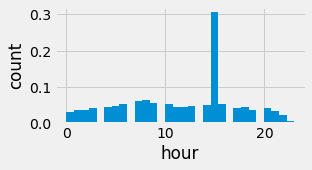

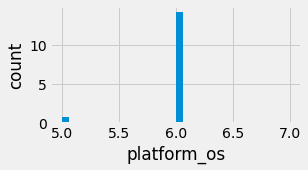

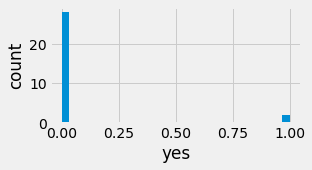

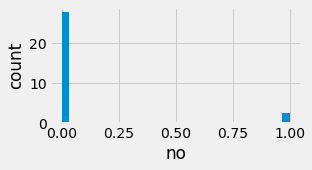

In [113]:
import matplotlib.pyplot as plt

for i in int_cols:
    plt.figure(figsize=(4,2))
    plt.hist(ads[i],density=True,bins=30)    
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()


Distribution of numerical variables are as shown by the above histograms.

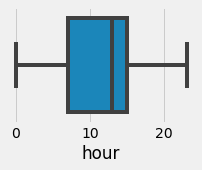

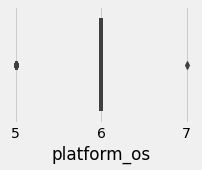

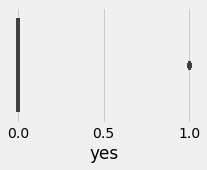

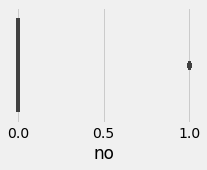

In [114]:
import matplotlib.pyplot as plt

for i in int_cols:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=ads[i])
    plt.show()


There are a few outliers in the platform_os, yes and no columns.

In [115]:
cat_cols

Index(['auction_id', 'experiment', 'device_make', 'browser'], dtype='object')

In [116]:
#only categorical variables with limited number of unique values
cat_cols2 = [col  for i,col in enumerate(cat_cols) if i == 1 or i==2 or i==3]
cat_cols2

['experiment', 'device_make', 'browser']

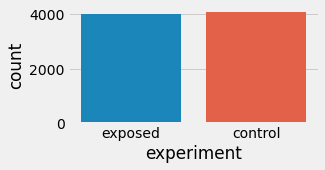

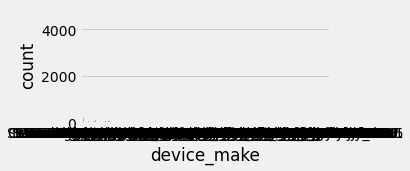

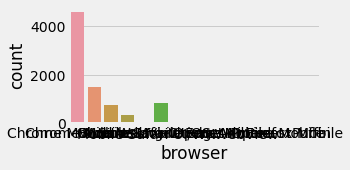

In [117]:
import seaborn as sns
for col in cat_cols2:
    plt.figure(figsize=(4,2))
    sns.countplot(x=col,data=ads)
    plt.show()    

Above countplots show the distribution of users response in regards to experiment, device_make abd browser.

experiment


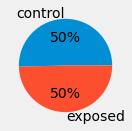

device_make


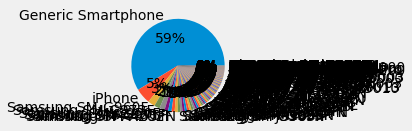

browser


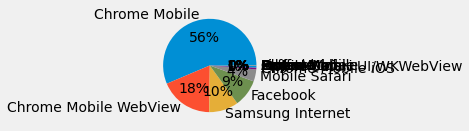

In [118]:
for col in cat_cols2:
    print(col)
    plt.figure(figsize=(4,2))
    df=ads[col].value_counts()
    plt.pie(df, labels=df.index, autopct="%.0f%%");
    plt.show() 

These pie chart also shows a similar distribution of the user responses in terms of the categorical variables. For example, 59% of user responses 
were recorded on "Generic Smartphone". 56% of users responded on Chrome mobile.

###### Multivariate analysis


<Figure size 216x144 with 0 Axes>

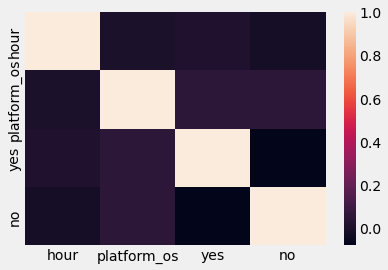

<Figure size 216x144 with 0 Axes>

In [119]:
corr = ads.corr()
sns.heatmap(round(corr,2))
plt.figure(figsize=(3,2))

This shows how each variable is correlated to the others. For example the correlation coefficient between platform_os and yes = 0.6.

###### Data wrangling

In [120]:
#find the rows, which has no response
df = ads[(ads['yes']==0) & (ads['no']==0)]
df.shape

(6834, 8)

In [121]:
#remove the no actions rows
df1=pd.concat([df,ads]).drop_duplicates(keep=False)
df1.shape

(1243, 8)

Once we remove from the dataset, observations with no answers (both 'yes' and 'no' columns == 0) we are only left with 1243 observations (-6834 obs). This significant loss of data causes a lack of observations to ensure that significant differences are detected. Hence we are keeping all data.

In [122]:
#collect only exposed group data
exposed_data = ads[ads['experiment']=='exposed']
exposed_data

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
date_of_experiment,,,,,,,,
2020-07-10,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-07,000eabc5-17ce-4137-8efe-44734d914446,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2,E5823,6,Chrome Mobile WebView,0,1
2020-07-04,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
2020-07-06,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
...,...,...,...,...,...,...,...,...
2020-07-09,ffbc02cb-628a-4de5-87fc-5d76b7d796e5,exposed,17,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,ffc594ef-756c-4d24-a310-0d8eb4e11eb7,exposed,1,Samsung SM-G950F,6,Chrome Mobile WebView,0,0
2020-07-03,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,4,Generic Smartphone,6,Chrome Mobile,0,1


In [123]:
d_yes = dict(exposed_data['yes'].value_counts())
d_no = dict(exposed_data['no'].value_counts())
df_exposed_yes=pd.DataFrame.from_records([d_yes]).reset_index(drop=True)
df_exposed_yes['Status']='yes'
df_exposed_no=pd.DataFrame.from_records([d_no]).reset_index(drop=True)
df_exposed_no['Status']='no'
df_exposed = pd.concat([df_exposed_yes,df_exposed_no]).reset_index(drop=True)
df_exposed

,0,1,Status
0,3698,308,yes
1,3657,349,no


Fo the exposed group, 308 observations out of 4006 were click yes responses. And 349 were click no responses.

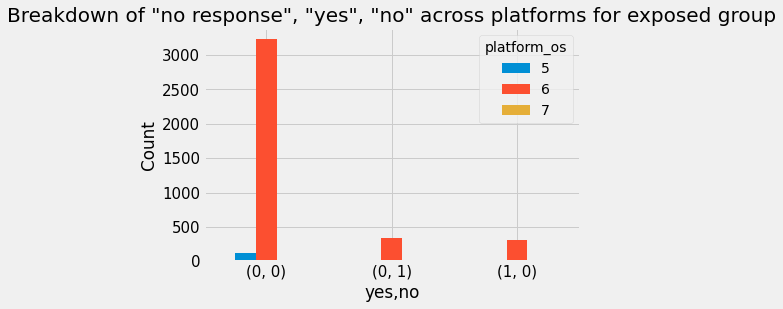

In [126]:
#show breakdown of no response, yes and no across platforms
ax = exposed_data.groupby(['platform_os', 'yes','no']).count()['auction_id'].unstack('platform_os').plot(
    kind='bar',
    figsize=(6,4),
    grid=True)

ax.tick_params(axis = 'x', labelsize= 15)
plt.xticks(rotation = 'horizontal')
ax.tick_params(axis = 'y', labelsize = 15)
ax.set_ylabel('Count')
ax.set_title('Breakdown of "no response", "yes", "no" across platforms for exposed group', fontsize = 20)

plt.show()

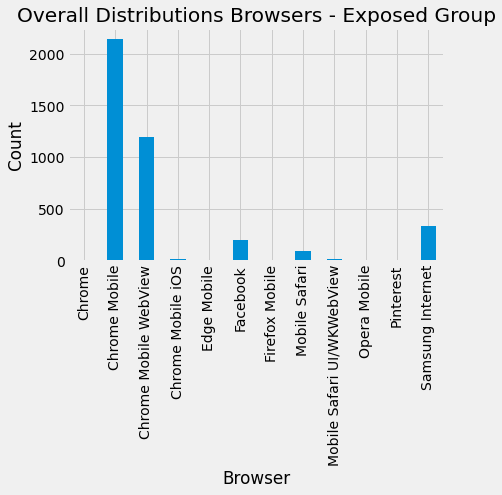

In [127]:
ax = exposed_data.groupby('browser').count()['auction_id'].plot(
    kind='bar', 
    figsize=(6,4),
    grid=True)

ax.set_xlabel('Browser')
ax.set_ylabel('Count')
ax.set_title('Overall Distributions Browsers - Exposed Group')

plt.show()

In [128]:
#collect only control group data
control_data = ads[ads['experiment']=='control']
control_data

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
date_of_experiment,,,,,,,,
2020-07-03,00187412-2932-4542-a8ef-3633901c98d9,control,15,Samsung SM-A705FN,6,Facebook,0,0
2020-07-03,001a7785-d3fe-4e11-a344-c8735acacc2c,control,15,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-03,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,15,Samsung SM-G960F,6,Facebook,0,0
2020-07-03,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,15,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-09,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,5,Samsung SM-G973F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...
2020-07-10,ffca1153-c182-4f32-9e90-2a6008417497,control,16,Generic Smartphone,6,Chrome Mobile,0,1
2020-07-03,ffcea781-a6e7-4f98-9d90-f95377270476,control,15,Samsung SM-N976B,6,Facebook,0,0
2020-07-03,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,15,Generic Smartphone,6,Chrome Mobile,0,0


In [129]:
control_data.shape

(4071, 8)

In [130]:
d_yes = dict(control_data['yes'].value_counts())
d_no = dict(control_data['no'].value_counts())
df_control_yes=pd.DataFrame.from_records([d_yes]).reset_index(drop=True)
df_control_yes['Status']='yes'
df_control_no=pd.DataFrame.from_records([d_no]).reset_index(drop=True)
df_control_no['Status']='no'
df_control = pd.concat([df_control_yes,df_control_no]).reset_index(drop=True)
df_control


,0,1,Status
0,3807,264,yes
1,3749,322,no


For the control group 264 observations out of 4071 were click yes responses. And 349 were click no responses.

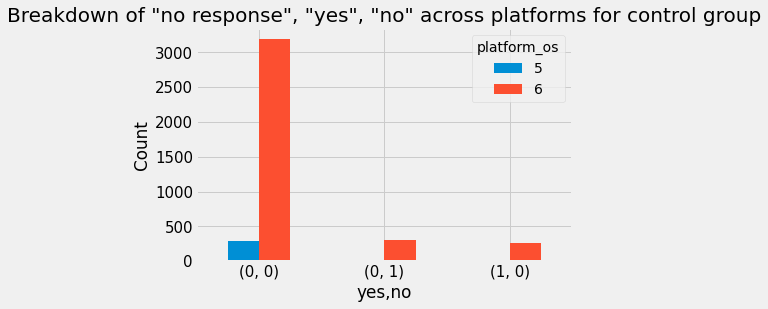

In [132]:
#show breakdown of no response, yes and no across platforms
ax = control_data.groupby(['platform_os', 'yes','no']).count()['auction_id'].unstack('platform_os').plot(
    kind='bar',
    figsize=(6,4),
    grid=True)

ax.tick_params(axis = 'x', labelsize= 15)
plt.xticks(rotation = 'horizontal')
ax.tick_params(axis = 'y', labelsize = 15)
ax.set_ylabel('Count')
ax.set_title('Breakdown of "no response", "yes", "no" across platforms for control group', fontsize = 20)

plt.show()

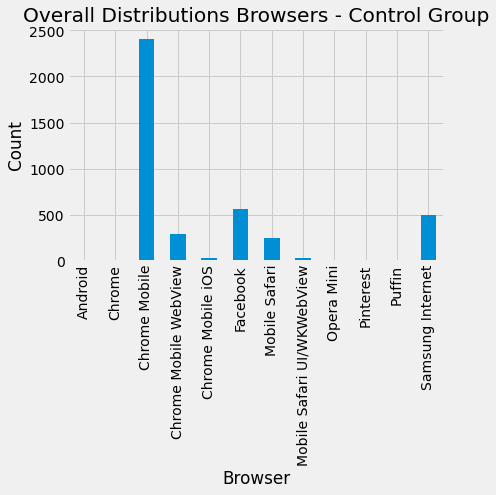

In [133]:
ax = control_data.groupby('browser').count()['auction_id'].plot(
    kind='bar', 
    figsize=(6,4),
    grid=True)

ax.set_xlabel('Browser')
ax.set_ylabel('Count')
ax.set_title('Overall Distributions Browsers - Control Group')

plt.show()